In [5]:
# Question 1: Feature Scaling
# Task: Explain why feature scaling is essential and demonstrate the impact of unscaled features on a machine learning model.




# Question 2: Min-Max Scaling
# Task: Implement Min-Max Scaling on the Iris dataset.



# Question 3: Standardization (Z-score Scaling)
# Task: Implement Standardization using Z-score scaling on the Iris dataset.




# Question 4: Robust Scaling
# Task: Implement Robust Scaling to handle outliers in the Iris dataset.







Accuracy with unscaled features: 1.0000
Accuracy with Min-Max scaled features: 1.0000
Accuracy with Standardized features: 1.0000
Accuracy with Robust Scaled features (with outlier): 0.9333


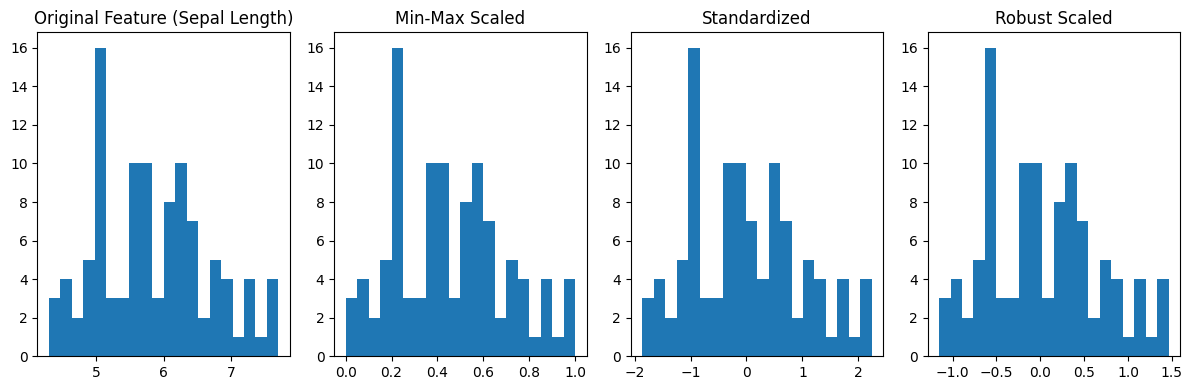

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Question 1: Impact of Unscaled Features on KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred)
print(f"Accuracy with unscaled features: {acc_unscaled:.4f}")

# Now apply Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

knn.fit(X_train_minmax, y_train)
y_pred_minmax = knn.predict(X_test_minmax)
acc_minmax = accuracy_score(y_test, y_pred_minmax)
print(f"Accuracy with Min-Max scaled features: {acc_minmax:.4f}")

# Question 2: Min-Max Scaling applied above

# Question 3: Standardization (Z-score Scaling)
scaler_standard = StandardScaler()
X_train_std = scaler_standard.fit_transform(X_train)
X_test_std = scaler_standard.transform(X_test)

knn.fit(X_train_std, y_train)
y_pred_std = knn.predict(X_test_std)
acc_std = accuracy_score(y_test, y_pred_std)
print(f"Accuracy with Standardized features: {acc_std:.4f}")

# Question 4: Robust Scaling to handle outliers
# Introduce artificial outliers in test data to simulate effect
X_test_outliers = X_test.copy()
X_test_outliers[0, 0] = 100  # extreme outlier in first feature

scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test_outliers)

knn.fit(X_train_robust, y_train)
y_pred_robust = knn.predict(X_test_robust)
acc_robust = accuracy_score(y_test, y_pred_robust)
print(f"Accuracy with Robust Scaled features (with outlier): {acc_robust:.4f}")

# Optional: Visualization of distributions for one feature before and after scaling
plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.hist(X_train[:, 0], bins=20)
plt.title("Original Feature (Sepal Length)")

plt.subplot(1,4,2)
plt.hist(X_train_minmax[:, 0], bins=20)
plt.title("Min-Max Scaled")

plt.subplot(1,4,3)
plt.hist(X_train_std[:, 0], bins=20)
plt.title("Standardized")

plt.subplot(1,4,4)
plt.hist(X_train_robust[:, 0], bins=20)
plt.title("Robust Scaled")

plt.tight_layout()
plt.show()
